In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

# Register date converters for matplotlib
register_matplotlib_converters()

# Jupyter display settings
%matplotlib inline
plt.style.use("ggplot")


In [11]:
# Load Power Rangers episodes dataset
episodes = pd.read_csv("data/episodes.csv", parse_dates=["air_date"])
seasons = pd.read_csv("data/seasons.csv", parse_dates=["air_date_first_ep", "air_date_last_ep"])

# Preview the data
episodes.head()

,season_title,episode_num,episode_title,air_date,IMDB_rating,total_votes,desc
0,Mighty Morphin (Season 1),0,The Lost Episode,1999-05-22,6.7,113,Original version of the premiere episode.
1,Mighty Morphin (Season 1),1,Day of the Dumpster,1993-08-28,7.4,687,Following the accidental release of long-impri...
2,Mighty Morphin (Season 1),2,High Five,1993-09-04,6.9,564,Rita plans to trap the Rangers in a time trap ...
3,Mighty Morphin (Season 1),3,Teamwork,1993-09-08,7.3,546,Trini and Kimberly set up a petition to clean ...
4,Mighty Morphin (Season 1),4,A Pressing Engagement,1993-09-09,6.9,535,Jason is trying to break the bench press recor...


In [4]:
# Set datetime index
episodes.set_index("air_date", inplace=True)

# Drop rows with missing titles or episode numbers
episodes.dropna(subset=["episode_title", "episode_num"], inplace=True)

# Feature engineering
episodes["year"] = episodes.index.year
episodes["month"] = episodes.index.month
episodes["day_of_week"] = episodes.index.day_name()

episodes.head()


,season_title,episode_num,episode_title,IMDB_rating,total_votes,desc,year,month,day_of_week
air_date,,,,,,,,,
1999-05-22,Mighty Morphin (Season 1),0,The Lost Episode,6.7,113,Original version of the premiere episode.,1999,5,Saturday
1993-08-28,Mighty Morphin (Season 1),1,Day of the Dumpster,7.4,687,Following the accidental release of long-impri...,1993,8,Saturday
1993-09-04,Mighty Morphin (Season 1),2,High Five,6.9,564,Rita plans to trap the Rangers in a time trap ...,1993,9,Saturday
1993-09-08,Mighty Morphin (Season 1),3,Teamwork,7.3,546,Trini and Kimberly set up a petition to clean ...,1993,9,Wednesday
1993-09-09,Mighty Morphin (Season 1),4,A Pressing Engagement,6.9,535,Jason is trying to break the bench press recor...,1993,9,Thursday


In [5]:
# Episodes per year
episodes_per_year = episodes.groupby("year")["episode_title"].count()

# Episodes per month
episodes_per_month = episodes.groupby("month")["episode_title"].count()

# Episodes per weekday
episodes_by_dow = (
    episodes.groupby("day_of_week")["episode_title"]
    .count()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)

# Pivot table: monthly trend across years
monthly_pivot = episodes.pivot_table(
    index="year", columns="month", values="episode_title", aggfunc="count"
)

# Top 1% highest rated episodes
top_rated = episodes[episodes["IMDB_rating"] >= episodes["IMDB_rating"].quantile(0.99)]
top_rated[["season_title", "episode_title", "IMDB_rating"]].sort_values("IMDB_rating", ascending=False).head(10)


,season_title,episode_title,IMDB_rating
air_date,,,
2020-12-05,Beast Morphers (Season 2),Source Code,9.7
1998-11-20,In Space,Countdown to Destruction: Part 1,9.4
1998-11-21,In Space,Countdown to Destruction: Part 2,9.4
2020-10-10,Beast Morphers (Season 2),Finders Keepers,9.4
2020-12-12,Beast Morphers (Season 2),Evox Unleashed,9.4
2002-10-05,Wild Force,Forever Red,9.3
2020-04-25,Beast Morphers (Season 2),Secret Struggle,9.3
2020-09-26,Beast Morphers (Season 2),Intruder Alert!,9.3
1999-05-22,Lost Galaxy,Redemption Day,9.2


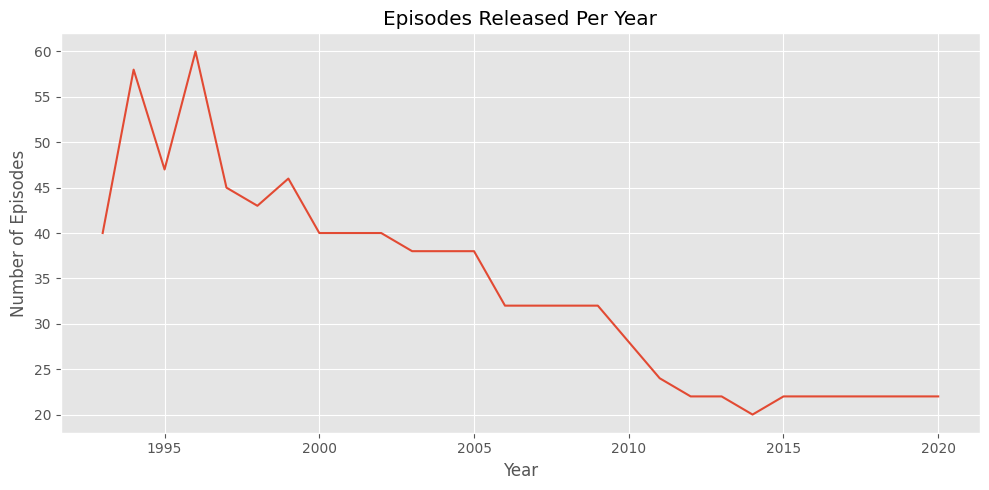

In [6]:
episodes_per_year.plot(
    title="Episodes Released Per Year",
    xlabel="Year",
    ylabel="Number of Episodes",
    figsize=(10, 5)
)
plt.tight_layout()
plt.show()


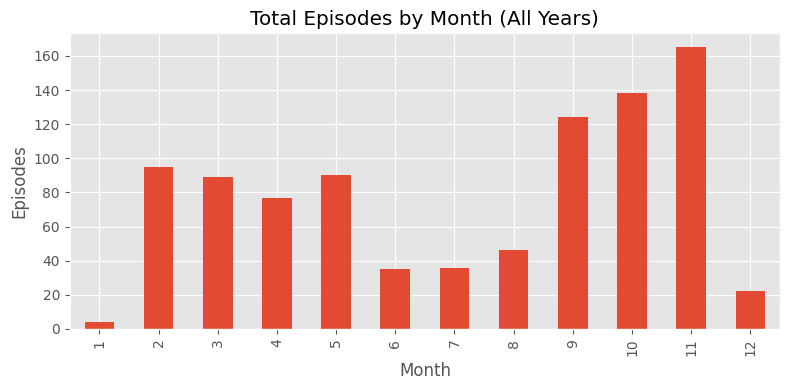

In [7]:
episodes_per_month.plot(
    kind="bar",
    title="Total Episodes by Month (All Years)",
    xlabel="Month",
    ylabel="Episodes",
    figsize=(8, 4)
)
plt.tight_layout()
plt.show()


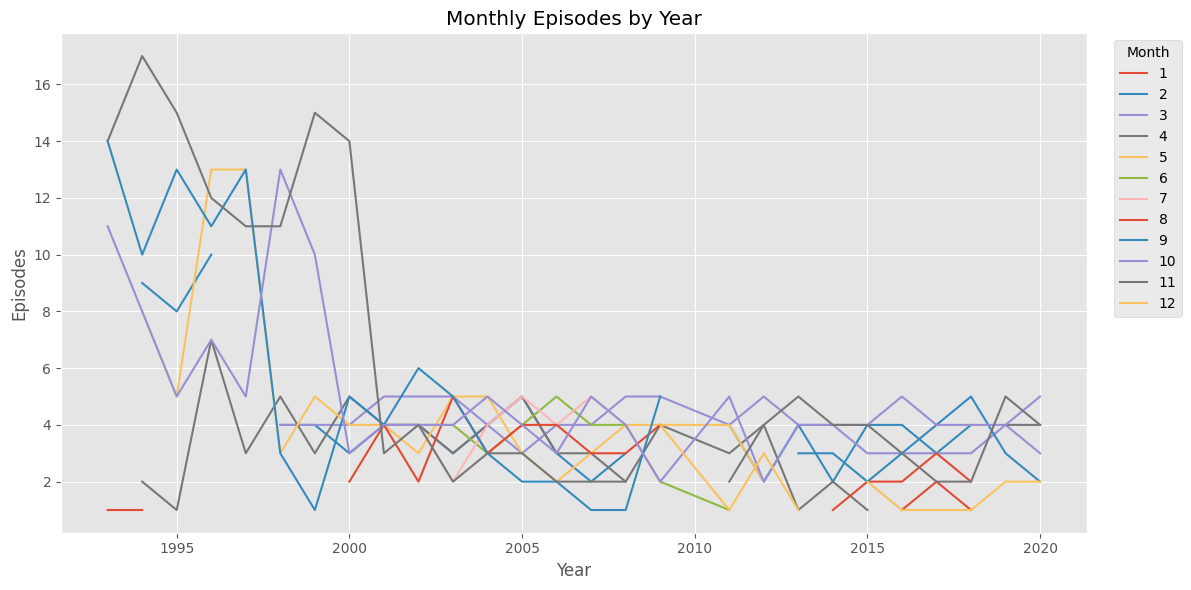

In [8]:
monthly_pivot.plot(
    title="Monthly Episodes by Year",
    xlabel="Year",
    ylabel="Episodes",
    figsize=(12, 6)
)
plt.legend(title="Month", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


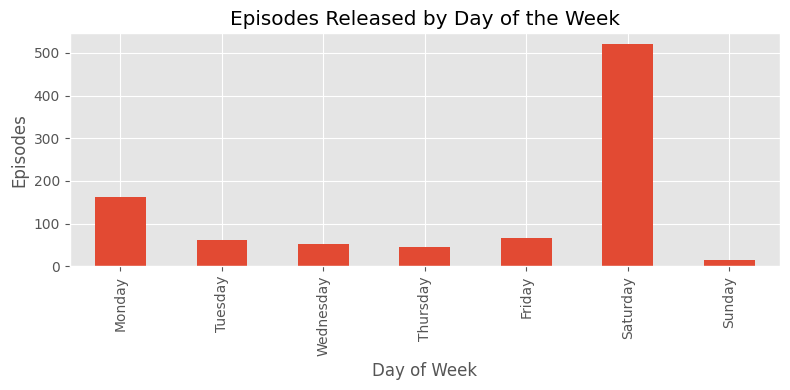

In [9]:
episodes_by_dow.plot(
    kind="bar",
    title="Episodes Released by Day of the Week",
    xlabel="Day of Week",
    ylabel="Episodes",
    figsize=(8, 4)
)
plt.tight_layout()
plt.show()


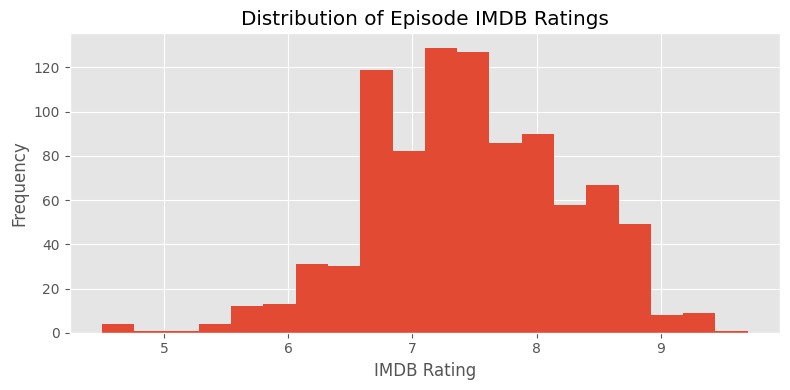

In [10]:
episodes["IMDB_rating"].dropna().plot(
    kind="hist",
    bins=20,
    title="Distribution of Episode IMDB Ratings",
    xlabel="IMDB Rating",
    figsize=(8, 4)
)
plt.tight_layout()
plt.show()
